In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

In [3]:
faces = datasets.fetch_olivetti_faces()

In [4]:
data = faces.data
images = faces.images

target = faces.target

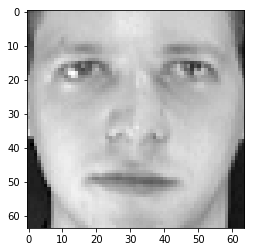

In [6]:
plt.imshow(images[0],cmap='gray')

In [8]:
images.shape,data.shape,target

((400, 64, 64),
 (400, 4096),
 array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
        15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
        18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
        20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21

In [ ]:
# 根据上半边脸预测下半边脸,400张照片，40个人，每人10张照片
# 测试数据和训练数据是谁 每人的8张照片训练，2张照片测试
# 样本和样本标签是谁 上半边脸是样本特征，下半边脸是样本标签

In [9]:
X_train = []
X_test = []
y_train = []
y_test = []

# 读取每一个人
for i in range(40):
    # 读取每一个人的10张照片
    for j in range(10):
        # 获取到人物的照片
        index = i*10 + j
        face_data = data[index]
        up_face = face_data[:2048]
        bottom_face = face_data[2048:]
        # 如果是前8张照片，就把上半边脸存放为训练数据，下半边脸存放为训练标签
        if j < 8:
            X_train.append(up_face)
            y_train.append(bottom_face)
        else:
            X_test.append(up_face)
            y_test.append(bottom_face)

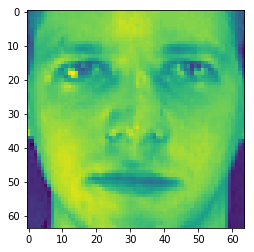

In [18]:
# 测试样本集拆分是否正常
face = np.vstack((X_train[0],y_train[0]))
plt.imshow(face.reshape((64,64)))

In [19]:
# 可选的机器学习模型
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [21]:
knn = KNeighborsRegressor()
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()

knn.fit(X_train,y_train)
linear.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
# 保存所有的预测结果
models = [knn,linear,ridge,lasso]
results = np.array([model.predict(X_test) for model in models])

In [24]:
# 4 表示4种算法
# 80 一共40个人，每人两张照片，所以一共是80个测试数据，对应的就是80个测试结果
# 2048 每一个测试结果都是下半边脸，所以2048,(32,64)
results.shape

(4, 80, 2048)

In [41]:
results[2].shape

(80, 2048)

In [43]:
np.array(X_test).shape

(80, 2048)

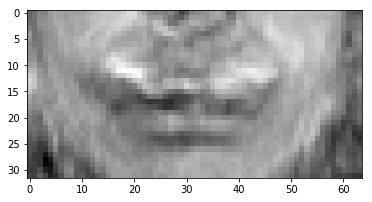

In [33]:
# plt.imshow(X_test[0].reshape((32,64)),cmap='gray')
plt.imshow(results[1][0].reshape((32,64)),cmap='gray')
# plt.imshow(y_test[0].reshape((32,64)),cmap='gray')

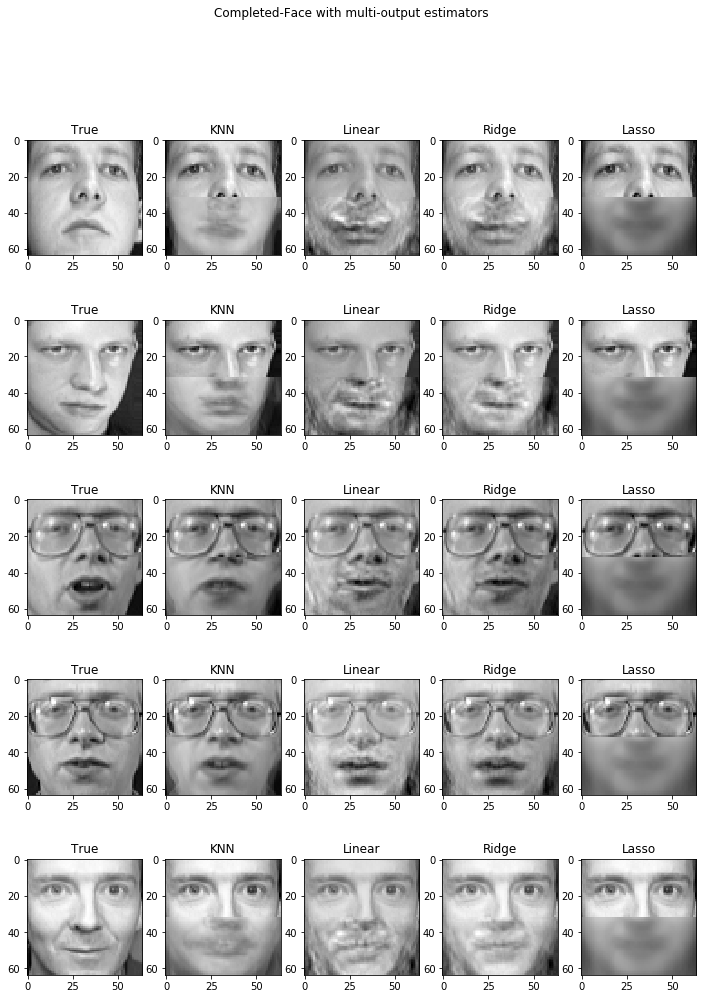

In [46]:
titles = ['KNN','Linear','Ridge','Lasso']
figure = plt.figure(figsize=(12,16))
figure.suptitle('Completed-Face with multi-output estimators')

for i in range(5):
    true_up_face = X_test[i]
    true_bottom_face = y_test[i]
    true_face = np.vstack((true_up_face,true_bottom_face)).reshape((64,64))
    axes = plt.subplot(5,5,i*5+1)
    axes.set_title('True')
    axes.imshow(true_face,cmap='gray')
    
    for index, result in enumerate(results):
        predict_bottom_face = result[i]
        predict_face = np.vstack((true_up_face,predict_bottom_face)).reshape((64,64))
        axes = plt.subplot(5,5,i*5+1+index+1)
        axes.imshow(predict_face,cmap='gray')
        axes.set_title(titles[index])